In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

df_pp = pd.read_csv("pp_labels.csv")
y_pp = np.asarray(df_pp['joint'])
df_no = pd.read_csv("no_labels.csv")
y_no = np.asarray(df_no['joint'])
df_p = pd.read_csv("p_labels.csv")
y_p = np.asarray(df_p['joint'])
df_r = pd.read_csv("r_labels.csv")
y_r = np.asarray(df_r['joint'])
y = np.append(y_pp , y_no)
y = np.append(y , y_p)
y = np.append(y , y_r)
#changing the labels from string to categorical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(y)
y.shape

(800,)

In [2]:
print("pp is"  , Y[0])
print("no joint is" , Y[201])
print("p joint is" , Y[401])
print("r joint is" , Y[601])

pp is 2
no joint is 0
p joint is 1
r joint is 3


In [3]:
df = pd.read_excel("data_set_label.xlsx")
x = []

for i in range(1 , 51, 1):
    for j in range(1, 51 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            if(i == 1 and j==2 ):
                img= resize(img , (2 , 96 , 96 , 3))
                x =  img
            else:
                img = resize(img , (2 , 96 , 96 , 3))
                x = np.append(x , img , axis = 0)
for i in range(51 , 101 , 1):
    for j in range(51, 101 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = resize(img , (2, 96, 96 , 3))
            x = np.append(x , img , axis=0)
for i in range(101 , 151 , 1):
    for j in range(101, 151 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = resize(img  , (2 , 96 , 96 , 3))
            x = np.append(x , img, axis=0)
for i in range(151 , 201 , 1):
    for j in range(151, 201 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = resize(img , (2 , 96 , 96 , 3))
            x = np.append(x , img  , axis=0)
del df

In [4]:
x.shape

(1600, 96, 96, 3)

In [5]:

x_t = np.reshape(x , (-1 , 2 , 96 , 96 , 3))
x_t.shape

(800, 2, 96, 96, 3)

In [6]:
from keras.utils import to_categorical 

y_t = to_categorical(Y)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(
    vertical_flip= True , horizontal_flip=True , width_shift_range=0.1 , channel_shift_range=0.3 , fill_mode='nearest' , 
    samplewise_std_normalization=True , featurewise_std_normalization=True
)


/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1469: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn(


In [8]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_t , y_t , test_size=0.1 )


In [9]:
import tensorflow as tf

x_1_train, x_2_train = tf.split(x_train, num_or_size_splits=2, axis=1)
x_1_train = tf.squeeze(x_1_train, axis=1)
x_2_train = tf.squeeze(x_2_train, axis=1)

x_1_test, x_2_test = tf.split(x_test, num_or_size_splits=2, axis=1)
x_1_test = tf.squeeze(x_1_test, axis=1)
x_2_test = tf.squeeze(x_2_test, axis=1)


Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-09-26 11:07:20.595290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-26 11:07:20.595537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
x_1_train.shape

TensorShape([720, 96, 96, 3])

## Our CNN design

In [12]:

# Import keras and other libraries
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate , Dropout , BatchNormalization
from keras.regularizers import L2 , L1 , L1L2
# Define the input shape for the images
input_shape = (96, 96, 3)

# Create two input layers for the two images
input_1 = Input(shape=input_shape, name='input_1')
input_2 = Input(shape=input_shape, name='input_2')



# Apply the convolutional base to both inputs
x1 = Conv2D(96*2 , kernel_size=(3 , 3) , activation="relu" ,  padding = 'valid' , kernel_regularizer=L2() )(input_1)
x1 = Conv2D(96*2, kernel_size=(3 , 3) , activation="relu"  , padding = 'valid' , kernel_regularizer=L1())(x1)


x2 = Conv2D(96*2, kernel_size=(3 , 3) , activation="relu"  ,  padding = 'valid', kernel_regularizer=L2())(input_2)
x2 = Conv2D(96*2 , kernel_size=(3 , 3) , activation="relu" ,  padding = 'valid' , kernel_regularizer=L1())(x2)

x1 = MaxPooling2D()(x1)
x2 = MaxPooling2D()(x2)

x1 = Conv2D(96, kernel_size=(3 , 3) , activation="relu" ,  padding = 'valid' , kernel_regularizer=L2())(x1)
x1 = Dropout(0.1)(x1)
x1 = Conv2D(96, kernel_size=(3 , 3) , activation="relu"  , padding = 'valid', kernel_regularizer=L1())(x1)


x2 = Conv2D(96 , kernel_size=(3 , 3) , activation="relu"  , padding = 'valid', kernel_regularizer=L2())(x2)
x2 = Dropout(0.1)(x2)
x2 = Conv2D(96 , kernel_size=(3 , 3) , activation="relu" , padding = 'valid' , kernel_regularizer=L1())(x2)


x1 = BatchNormalization()(x1)
x2 = BatchNormalization()(x2)

x1 = MaxPooling2D()(x1)
x2 = MaxPooling2D()(x2)

#concate two inputs
x = Concatenate()([x1, x2])

# before flatten, we do another layer of convolutions

x = Conv2D(128, kernel_size=(3 , 3) , activation='relu' , padding = 'valid'  )(x)
x = Dropout(0.1)(x)
x = Conv2D(128, kernel_size=(3 , 3) , activation='relu' , padding = 'valid' )(x)


x = Conv2D(96, kernel_size=(3 , 3) , activation='relu' ,padding = 'valid' )(x)
x = Dropout(0.1)(x)
x = Conv2D(96 ,  kernel_size=(3 , 3) , activation='relu' , padding = 'valid' )(x)
x = MaxPooling2D()(x)

x = Conv2D(64, kernel_size=(3 , 3) , activation='relu' , padding = 'valid' )(x)
x = Dropout(0.1)(x)
x = Conv2D(64, kernel_size=(3 , 3) , activation='relu' , padding = 'valid',)(x)
x = MaxPooling2D()(x)
x = BatchNormalization()(x)
#flatting

x = Flatten()(x)

x = Dense(64, activation='relu' , kernel_regularizer=L1L2(l1= 0.01 , l2 = 0.01))(x)

x = Dropout(0.05)(x)

x = Dense(32, activation='relu')(x)

output = Dense(4, activation='softmax' , kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x)

# Create the model with the two inputs and one output
model = Model(inputs=[input_1, input_2], outputs=output)

# Compile the model with an optimizer, a loss function and a metric
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 94, 94, 192)          5376      ['input_1[0][0]']             
                                                                                                  
 conv2d_16 (Conv2D)          (None, 94, 94, 192)          5376      ['input_2[0][0]']             
                                                                                            

In [13]:
clasy = model.fit(
    [x_1_train , x_2_train], y_train, batch_size=28 , steps_per_epoch=len(x_train)//28 ,
    validation_data=([x_1_test , x_2_test], y_test) , 
    epochs = 70 , verbose = 1 )

Epoch 1/70


2023-09-26 11:09:21.824492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 121.5374 - accuracy: 0.2843

2023-09-26 11:09:33.922912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 13s 324ms/step - loss: 121.5374 - accuracy: 0.2843 - val_loss: 57.0153 - val_accuracy: 0.2125
Epoch 2/70
25/25 [==============================] - 9s 301ms/step - loss: 30.0391 - accuracy: 0.3251 - val_loss: 16.3506 - val_accuracy: 0.2250
Epoch 3/70
25/25 [==============================] - 7s 298ms/step - loss: 9.8402 - accuracy: 0.3121 - val_loss: 9.0618 - val_accuracy: 0.2250
Epoch 4/70
25/25 [==============================] - 7s 300ms/step - loss: 5.9358 - accuracy: 0.3483 - val_loss: 7.3600 - val_accuracy: 0.3000
Epoch 5/70
25/25 [==============================] - 7s 295ms/step - loss: 4.7629 - accuracy: 0.3540 - val_loss: 6.3588 - val_accuracy: 0.3000
Epoch 6/70
25/25 [==============================] - 7s 300ms/step - loss: 4.1113 - accuracy: 0.3931 - val_loss: 5.3522 - val_accuracy: 0.3000
Epoch 7/70
25/25 [==============================] - 7s 297ms/step - loss: 3.6029 - accuracy: 0.3685 - val_loss: 4.5590 - val_accuracy: 0.3000
Epoch 8/70


In [19]:
d1 = np.asanyarray(clasy.history['loss'])
d2 = np.asanyarray(clasy.history['val_loss'])

df = pd.DataFrame([d1 , d2])
print(df)
df.to_excel("regression.xlsx")

           0          1         2         3         4         5         6   \
0  121.537430  30.039133  9.840210  5.935809  4.762904  4.111306  3.602938   
1   57.015331  16.350643  9.061784  7.360013  6.358810  5.352195  4.558959   

         7         8         9   ...        60        61        62        63  \
0  3.224076  2.995136  2.899405  ...  1.511829  1.476106  1.486901  1.506665   
1  4.522743  3.893206  2.995246  ...  2.855277  1.999074  1.465931  1.534695   

          64        65        66        67        68        69  
0   1.454766  1.393716  1.426705  1.411305  1.451293  1.483597  
1  10.014273  1.411474  2.644969  1.538646  3.665193  3.289466  

[2 rows x 70 columns]


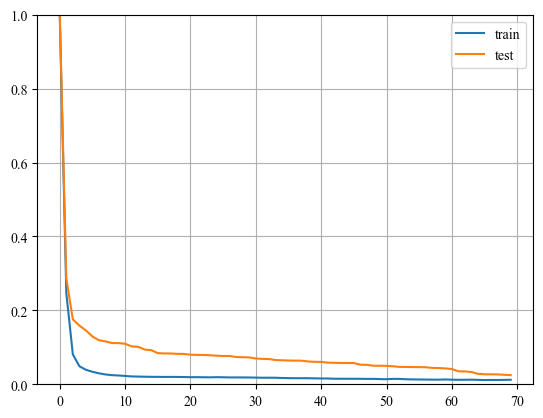

In [50]:
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')
plt.plot((d1/max(d1)) , label = 'train')

plt.plot(np.sort(d2/max(d2))[::-1] , label = 'test')
plt.legend()
plt.ylim([0 , 1])

plt.grid()
plt.savefig("Loss_of_train_and_test_classification.SVG")
plt.show()


In [155]:
import sklearn

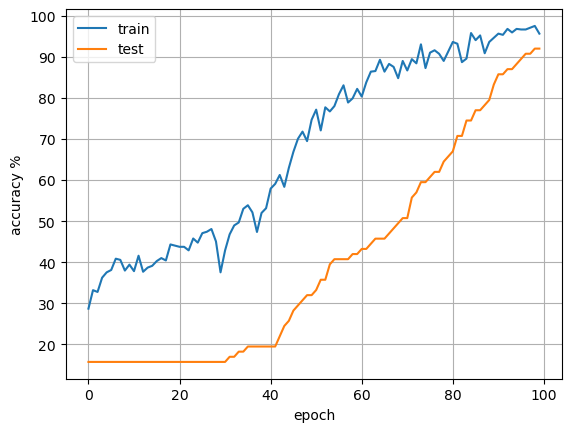

In [219]:
plt.plot(clasy.history['accuracy'])

plt.plot(clasy.history['val_accuracy'][0:100])
plt.xlabel("epoch")
plt.ylabel("accuracy %")
plt.legend()
plt.grid()
plt.savefig("Accuracy_of_train_and_test_classification.png",  dpi = 2400)
plt.show()

In [29]:
pred = model.predict([x_1_test , x_2_test])

3/3 [==============================] - 0s 75ms/step


In [17]:
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay

In [18]:
from keras.utils import to_ordinal

pred_label = []
test_label = []
for i in pred:
    pred_label.append(np.argmax(i))
for i in y_test:
    test_label.append(np.argmax(i))

In [37]:
h = model.fit(
    [x_1_train , x_2_train], y_train, batch_size=32, steps_per_epoch=len(x_train)//32 ,
    validation_data=([x_1_test , x_2_test], y_test) , 
    epochs = 10 , verbose = 1 )

Epoch 1/10
22/22 [==============================] - 4s 196ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0712 - val_accuracy: 0.9625
Epoch 2/10
22/22 [==============================] - 4s 184ms/step - loss: 0.0188 - accuracy: 0.9956 - val_loss: 0.0350 - val_accuracy: 0.9875
Epoch 3/10
22/22 [==============================] - 4s 181ms/step - loss: 0.0373 - accuracy: 0.9884 - val_loss: 0.2386 - val_accuracy: 0.9500
Epoch 4/10
 4/22 [====>.........................] - ETA: 2s - loss: 0.0162 - accuracy: 0.9911

KeyboardInterrupt: 

In [38]:
pred = model.predict([x_1_test , x_2_test])

pred_label = []
test_label = []
for i in pred:
    pred_label.append(np.argmax(i))
for i in y_test:
    test_label.append(np.argmax(i))

3/3 [==============================] - 0s 73ms/step


In [39]:
print(classification_report(test_label , pred_label))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       1.00      0.89      0.94        19
           2       0.96      0.96      0.96        24
           3       0.84      1.00      0.91        16

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



In [40]:
model.save("classifier.h5")

/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Drop out
# Batch Normalization
#Data Augmentation
# deep 

## Using VGG 16

In [41]:
import keras 
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate , Dropout , BatchNormalization  , LayerNormalization


VGG_layer = VGG16(weights=None , classes=4 , input_shape=(96 , 96 , 6))

/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/applications/vgg16.py:137: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 6 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


In [42]:
input_shape = (96, 96, 3)
input_1 = Input(shape=input_shape, name='input_1')
input_2 = Input(shape=input_shape, name='input_2')
x = Concatenate()([input_1, input_2])
output = VGG_layer(x)
model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(optimizer=keras.optimizers.legacy.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 concatenate_11 (Concatenat  (None, 96, 96, 6)            0         ['input_1[0][0]',             
 e)                                                                  'input_2[0][0]']             
                                                                                                  
 vgg16 (Functional)          (None, 4)                    5039258   ['concatenate_11[0][0]'

In [43]:
vgg = model.fit(
    [x_1_train , x_2_train], y_train, batch_size=32, steps_per_epoch=len(x_train)//32 ,
    validation_data=([x_1_test , x_2_test], y_test) , 
    epochs = 100 , verbose = 1 )

Epoch 1/100


2023-09-03 14:15:43.518881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 1.4038 - accuracy: 0.2557

2023-09-03 14:15:47.526540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 5s 177ms/step - loss: 1.4038 - accuracy: 0.2557 - val_loss: 1.3896 - val_accuracy: 0.2125
Epoch 2/100
22/22 [==============================] - 4s 147ms/step - loss: 1.3867 - accuracy: 0.2558 - val_loss: 1.3871 - val_accuracy: 0.2125
Epoch 3/100
22/22 [==============================] - 3s 144ms/step - loss: 1.3875 - accuracy: 0.2267 - val_loss: 1.3871 - val_accuracy: 0.2500
Epoch 4/100
22/22 [==============================] - 3s 144ms/step - loss: 1.3869 - accuracy: 0.2485 - val_loss: 1.3873 - val_accuracy: 0.2125
Epoch 5/100
22/22 [==============================] - 3s 144ms/step - loss: 1.3867 - accuracy: 0.2456 - val_loss: 1.3870 - val_accuracy: 0.2125
Epoch 6/100
22/22 [==============================] - 3s 142ms/step - loss: 1.3861 - accuracy: 0.2674 - val_loss: 1.3872 - val_accuracy: 0.2125
Epoch 7/100
22/22 [==============================] - 3s 141ms/step - loss: 1.3865 - accuracy: 0.2471 - val_loss: 1.3873 - val_accuracy: 0.2125
Epoch 8/100

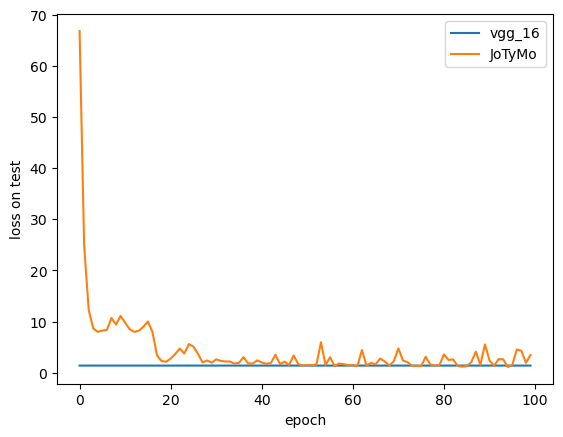

In [58]:
plt.plot(vgg.history['val_loss'] , label='vgg_16')
plt.plot(clasy.history['val_loss'] , label = 'JoTyMo')
plt.xlabel("epoch")
plt.ylabel("loss on test")
plt.legend()

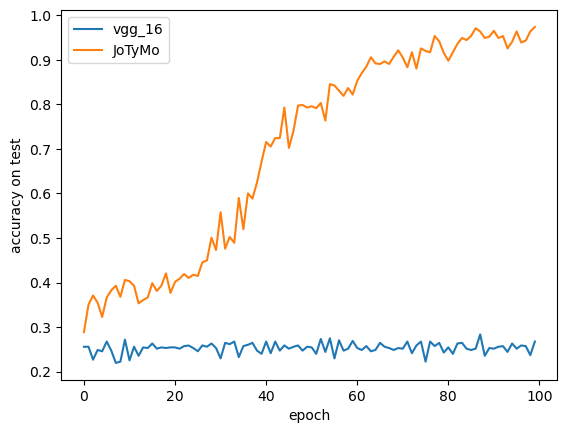

In [59]:
plt.plot(vgg.history['accuracy'] , label='vgg_16')
plt.plot(clasy.history['accuracy'] , label = 'JoTyMo')
plt.xlabel("epoch")
plt.ylabel("accuracy on test")
plt.legend()

In [34]:
predict = model.predict([[x_1_train , x_2_train]])

from sklearn.metrics import classification_report

pred = model.predict([x_1_test , x_2_test])

pred_label = []
test_label = []
for i in pred:
    pred_label.append(np.argmax(i))
for i in y_test:
    test_label.append(np.argmax(i))
print(classification_report(test_label , pred_label))

 3/23 [==>...........................] - ETA: 0s

2023-08-19 09:54:58.708576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/3 [=========>....................] - ETA: 0s

2023-08-19 09:54:59.818890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 76ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        20
           2       0.19      1.00      0.32        15
           3       0.00      0.00      0.00        23

    accuracy                           0.19        80
   macro avg       0.05      0.25      0.08        80
weighted avg       0.04      0.19      0.06        80



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


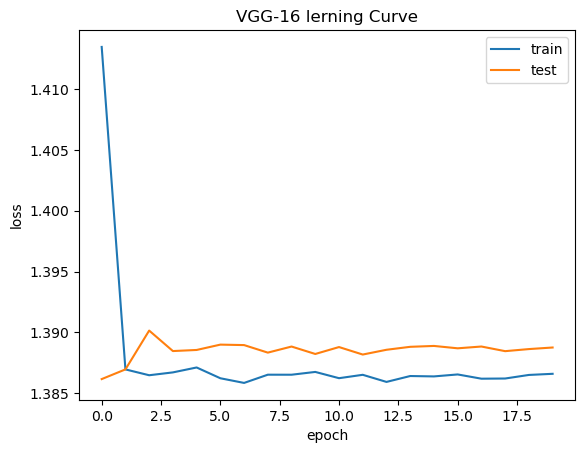

In [42]:
plt.plot(h.history['loss'] , label = 'train')
plt.plot(h.history['val_loss'] , label = 'test')
plt.title("VGG-16 lerning Curve")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## Using VGG 19 

In [37]:
from keras.applications import VGG19

VGG_layer = VGG19(weights=None , input_shape=(96 , 96 , 6) , classes=4)

input_shape = (96, 96, 3)
input_1 = Input(shape=input_shape, name='input_1')
input_2 = Input(shape=input_shape, name='input_2')
x = Concatenate()([input_1, input_2])
output = VGG_layer(x)
model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(optimizer=keras.optimizers.legacy.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 concatenate_8 (Concatenate  (None, 96, 96, 6)            0         ['input_1[0][0]',             
 )                                                                   'input_2[0][0]']             
                                                                                                  
 vgg19 (Functional)          (None, 4)                    5570227   ['concatenate_8[0][0]'] 

/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/applications/vgg19.py:137: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 6 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


In [43]:
h = model.fit(
    [x_1_train , x_2_train], y_train, batch_size=32, steps_per_epoch=len(x_train)//32 ,
    validation_data=([x_1_test , x_2_test], y_test) , 
    epochs = 20 , verbose = 1 )

Epoch 1/20


2023-08-19 09:59:31.097444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 1.3969 - accuracy: 0.2386

2023-08-19 09:59:35.238233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 5s 186ms/step - loss: 1.3969 - accuracy: 0.2386 - val_loss: 1.3847 - val_accuracy: 0.2875
Epoch 2/20
22/22 [==============================] - 4s 173ms/step - loss: 1.3878 - accuracy: 0.2108 - val_loss: 1.3883 - val_accuracy: 0.1875
Epoch 3/20
22/22 [==============================] - 4s 169ms/step - loss: 1.3862 - accuracy: 0.2631 - val_loss: 1.3883 - val_accuracy: 0.1875
Epoch 4/20
22/22 [==============================] - 4s 167ms/step - loss: 1.3863 - accuracy: 0.2645 - val_loss: 1.3886 - val_accuracy: 0.1875
Epoch 5/20
22/22 [==============================] - 4s 167ms/step - loss: 1.3871 - accuracy: 0.2340 - val_loss: 1.3873 - val_accuracy: 0.1875
Epoch 6/20
22/22 [==============================] - 4s 166ms/step - loss: 1.3865 - accuracy: 0.2645 - val_loss: 1.3883 - val_accuracy: 0.1875
Epoch 7/20
22/22 [==============================] - 4s 168ms/step - loss: 1.3861 - accuracy: 0.2645 - val_loss: 1.3883 - val_accuracy: 0.1875
Epoch 8/20
22/22 

In [44]:
predict = model.predict([[x_1_train , x_2_train]])

from sklearn.metrics import classification_report

pred = model.predict([x_1_test , x_2_test])

pred_label = []
test_label = []
for i in pred:
    pred_label.append(np.argmax(i))
for i in y_test:
    test_label.append(np.argmax(i))
print(classification_report(test_label , pred_label))

 1/23 [>.............................] - ETA: 4s

2023-08-19 10:00:54.271676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/3 [=========>....................] - ETA: 0s

2023-08-19 10:00:55.702003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 88ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        20
           2       0.19      1.00      0.32        15
           3       0.00      0.00      0.00        23

    accuracy                           0.19        80
   macro avg       0.05      0.25      0.08        80
weighted avg       0.04      0.19      0.06        80



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


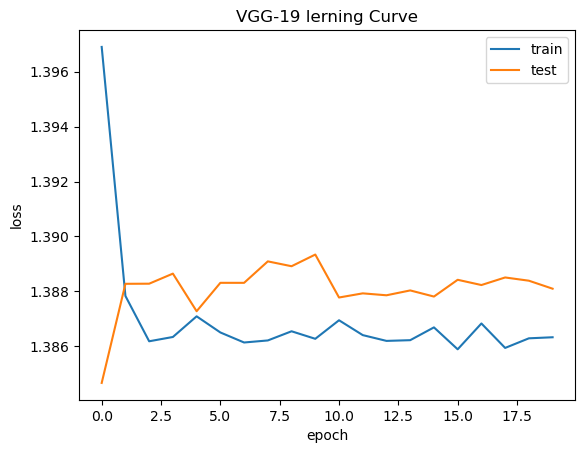

In [45]:
plt.plot(h.history['loss'] , label = 'train')
plt.plot(h.history['val_loss'] , label = 'test')
plt.title("VGG-19 lerning Curve")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## Resnet 

In [63]:
from keras.applications import ResNet50

Resnet_layer = ResNet50(weights=None , input_shape=(96 , 96 , 6) , classes=4)

input_shape = (96, 96, 3)
input_1 = Input(shape=input_shape, name='input_1')
input_2 = Input(shape=input_shape, name='input_2')
x = Concatenate()([input_1, input_2])
output = Resnet_layer(x)
model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(optimizer=keras.optimizers.legacy.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 concatenate_14 (Concatenat  (None, 96, 96, 6)            0         ['input_1[0][0]',             
 e)                                                                  'input_2[0][0]']             
                                                                                                  
 resnet50 (Functional)       (None, 4)                    2360531   ['concatenate_14[0][0]'

In [64]:
resnet= model.fit(
    gen.flow([x_1_train , x_2_train], y_train, batch_size=32), steps_per_epoch=len(x_train)//32 ,
    validation_data=([x_1_test , x_2_test], y_test) , 
    epochs = 100 , verbose = 1 )

Epoch 1/100


2023-09-03 15:07:22.390590: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-09-03 15:07:23.939749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 2.6192 - accuracy: 0.3270

2023-09-03 15:07:36.537223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 17s 496ms/step - loss: 2.6192 - accuracy: 0.3270 - val_loss: 6.4895 - val_accuracy: 0.2750
Epoch 2/100
22/22 [==============================] - 3s 132ms/step - loss: 1.5537 - accuracy: 0.5015 - val_loss: 2.1629 - val_accuracy: 0.2500
Epoch 3/100
22/22 [==============================] - 3s 125ms/step - loss: 0.9949 - accuracy: 0.6424 - val_loss: 1.6633 - val_accuracy: 0.2625
Epoch 4/100
22/22 [==============================] - 2s 103ms/step - loss: 0.8309 - accuracy: 0.6788 - val_loss: 1.8639 - val_accuracy: 0.2125
Epoch 5/100
22/22 [==============================] - 3s 150ms/step - loss: 0.7272 - accuracy: 0.7922 - val_loss: 1.6720 - val_accuracy: 0.2125
Epoch 6/100
22/22 [==============================] - 2s 111ms/step - loss: 0.7253 - accuracy: 0.7674 - val_loss: 1.7290 - val_accuracy: 0.2125
Epoch 7/100
22/22 [==============================] - 3s 134ms/step - loss: 0.5353 - accuracy: 0.8241 - val_loss: 2.7020 - val_accuracy: 0.2500
Epoch 8/10

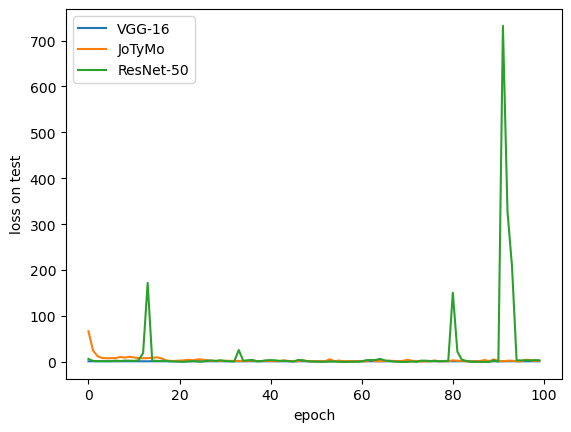

In [65]:
plt.plot(vgg.history['val_loss'] , label='VGG-16')
plt.plot(clasy.history['val_loss'] , label = 'JoTyMo')
plt.plot(resnet.history['val_loss'] , label = 'ResNet-50')
plt.xlabel("epoch")
plt.ylabel("loss on test")
plt.legend()

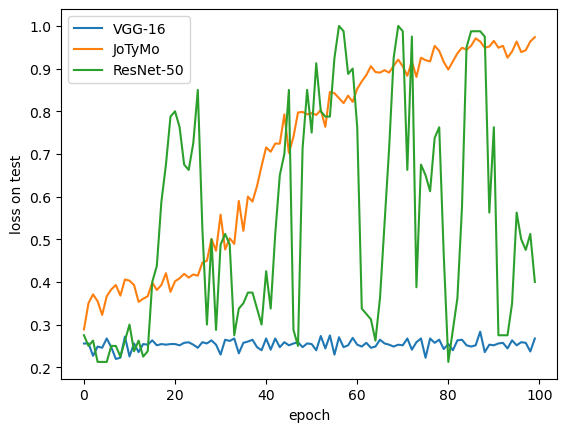

In [68]:
plt.plot(vgg.history['accuracy'] , label='VGG-16')
plt.plot(clasy.history['accuracy'] , label = 'JoTyMo')
plt.plot(resnet.history['val_accuracy'] , label = 'ResNet-50')
plt.xlabel("epoch")
plt.ylabel("loss on test")
plt.legend()

In [48]:
predict = model.predict([[x_1_train , x_2_train]])

from sklearn.metrics import classification_report

pred = model.predict([x_1_test , x_2_test])

pred_label = []
test_label = []
for i in pred:
    pred_label.append(np.argmax(i))
for i in y_test:
    test_label.append(np.argmax(i))
print(classification_report(test_label , pred_label))

2023-08-19 10:04:13.290189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 53ms/step


2023-08-19 10:04:15.414386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 548ms/step
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        22
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        15
           3       0.27      0.83      0.41        23

    accuracy                           0.28        80
   macro avg       0.14      0.24      0.15        80
weighted avg       0.16      0.28      0.17        80



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


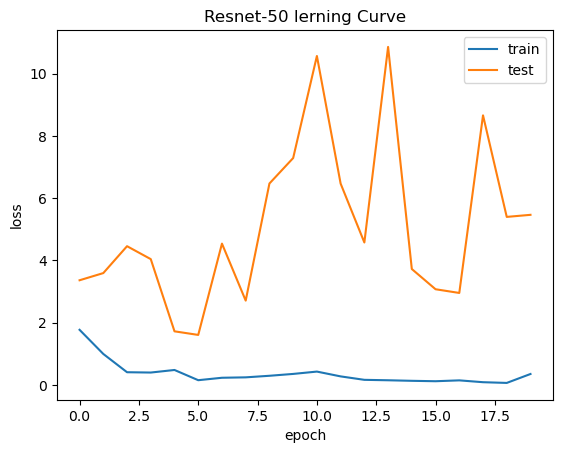

In [49]:
plt.plot(h.history['loss'] , label = 'train')
plt.plot(h.history['val_loss'] , label = 'test')
plt.title("Resnet-50 lerning Curve")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [67]:
from keras.applications import ResNet50V2


Resnet_layer = ResNet50V2(weights=None , input_shape=(96 , 96 , 6) , classes=4)

input_shape = (96, 96, 3)
input_1 = Input(shape=input_shape, name='input_1')
input_2 = Input(shape=input_shape, name='input_2')
x = Concatenate()([input_1, input_2])
output = Resnet_layer(x)
model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(optimizer=keras.optimizers.legacy.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary
model.summary()

/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/applications/resnet.py:159: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 6 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 concatenate_16 (Concatenat  (None, 96, 96, 6)            0         ['input_1[0][0]',             
 e)                                                                  'input_2[0][0]']             
                                                                                                  
 resnet50v2 (Functional)     (None, 4)                    2358240   ['concatenate_16[0][0]'

In [68]:
h = model.fit(
    [x_1_train , x_2_train], y_train, batch_size=32, steps_per_epoch=len(x_train)//32 ,
    validation_data=([x_1_test , x_2_test], y_test) , 
    epochs = 20 , verbose = 1 )

Epoch 1/20


2023-08-19 10:18:16.448738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 1.1020 - accuracy: 0.5227

2023-08-19 10:18:28.579568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 18s 503ms/step - loss: 1.1020 - accuracy: 0.5227 - val_loss: 1.6098 - val_accuracy: 0.2500
Epoch 2/20
22/22 [==============================] - 6s 161ms/step - loss: 0.4502 - accuracy: 0.8169 - val_loss: 1.5264 - val_accuracy: 0.2875
Epoch 3/20
22/22 [==============================] - 3s 129ms/step - loss: 0.2420 - accuracy: 0.9186 - val_loss: 1.6570 - val_accuracy: 0.2875
Epoch 4/20
22/22 [==============================] - 3s 122ms/step - loss: 0.4329 - accuracy: 0.8416 - val_loss: 2.7947 - val_accuracy: 0.2875
Epoch 5/20
22/22 [==============================] - 3s 137ms/step - loss: 0.3114 - accuracy: 0.8910 - val_loss: 1.8889 - val_accuracy: 0.2500
Epoch 6/20
22/22 [==============================] - 2s 95ms/step - loss: 0.3108 - accuracy: 0.8968 - val_loss: 5.3441 - val_accuracy: 0.1875
Epoch 7/20
22/22 [==============================] - 4s 173ms/step - loss: 0.1228 - accuracy: 0.9535 - val_loss: 4.4357 - val_accuracy: 0.1375
Epoch 8/20
22/22 

In [70]:
from sklearn.metrics import classification_report

pred = model.predict([x_1_test , x_2_test])

pred_label = []
test_label = []
for i in pred:
    pred_label.append(np.argmax(i))
for i in y_test:
    test_label.append(np.argmax(i))
print(classification_report(test_label , pred_label))

3/3 [==============================] - 1s 281ms/step
              precision    recall  f1-score   support

           0       1.00      0.14      0.24        22
           1       1.00      0.20      0.33        20
           2       0.25      1.00      0.41        15
           3       0.79      0.48      0.59        23

    accuracy                           0.41        80
   macro avg       0.76      0.45      0.39        80
weighted avg       0.80      0.41      0.40        80



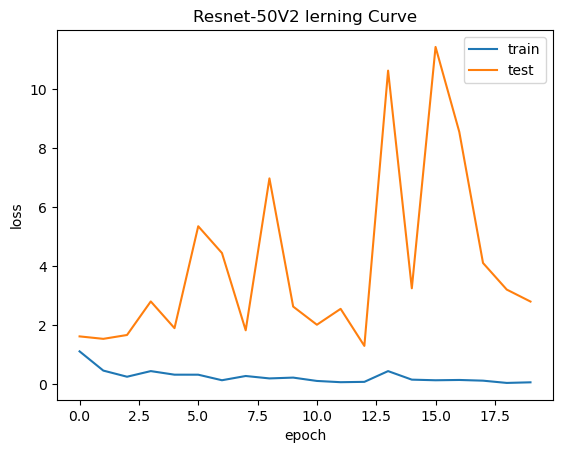

In [71]:
plt.plot(h.history['loss'] , label = 'train')
plt.plot(h.history['val_loss'] , label = 'test')
plt.title("Resnet-50V2 lerning Curve")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## Inception V3

In [70]:
from keras.applications import InceptionV3

Inception_layer = InceptionV3(weights = None , input_shape=(96 , 96 , 6) , classes=4)

input_shape = (96, 96, 3)
input_1 = Input(shape=input_shape, name='input_1')
input_2 = Input(shape=input_shape, name='input_2')
x = Concatenate()([input_1, input_2])
output = Inception_layer(x)
model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(optimizer=keras.optimizers.legacy.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary
model.summary()

/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/applications/inception_v3.py:138: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 6 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 concatenate_20 (Concatenat  (None, 96, 96, 6)            0         ['input_1[0][0]',             
 e)                                                                  'input_2[0][0]']             
                                                                                                  
 inception_v3 (Functional)   (None, 4)                    2181184   ['concatenate_20[0][0]'

In [71]:
inception= model.fit(
    gen.flow([x_1_train , x_2_train], y_train, batch_size=32), steps_per_epoch=len(x_train)//32 ,
    validation_data=([x_1_test , x_2_test], y_test) , 
    epochs = 100 , verbose = 1 )

Epoch 1/100


2023-09-03 15:14:12.492762: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-09-03 15:14:14.464626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 1.8441 - accuracy: 0.3706

2023-09-03 15:14:41.624873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 33s 898ms/step - loss: 1.8441 - accuracy: 0.3706 - val_loss: 1.4216 - val_accuracy: 0.2625
Epoch 2/100
22/22 [==============================] - 4s 175ms/step - loss: 1.1745 - accuracy: 0.4491 - val_loss: 1.4887 - val_accuracy: 0.2625
Epoch 3/100
22/22 [==============================] - 3s 122ms/step - loss: 1.0701 - accuracy: 0.5872 - val_loss: 1.6373 - val_accuracy: 0.2125
Epoch 4/100
22/22 [==============================] - 3s 144ms/step - loss: 1.0043 - accuracy: 0.6105 - val_loss: 1.8241 - val_accuracy: 0.2125
Epoch 5/100
22/22 [==============================] - 3s 146ms/step - loss: 0.7502 - accuracy: 0.7311 - val_loss: 1.7553 - val_accuracy: 0.2125
Epoch 6/100
22/22 [==============================] - 2s 101ms/step - loss: 0.6953 - accuracy: 0.7209 - val_loss: 1.7345 - val_accuracy: 0.2750
Epoch 7/100
22/22 [==============================] - 2s 98ms/step - loss: 0.6999 - accuracy: 0.7500 - val_loss: 2.3699 - val_accuracy: 0.2750
Epoch 8/100

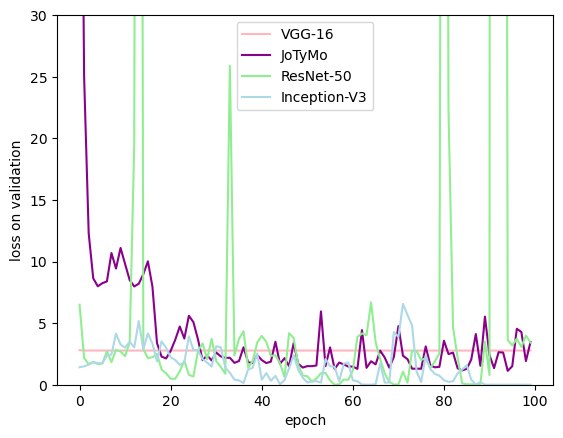

In [146]:
plt.plot(np.array(vgg.history['val_loss']) , label='VGG-16' , color = 'lightpink')
plt.plot(clasy.history['val_loss'] , label = 'JoTyMo' , color = 'darkmagenta')
plt.plot(resnet.history['val_loss'] , label = 'ResNet-50' , color = 'lightgreen')
plt.plot(inception.history['val_loss'] , label = 'Inception-V3' , color = 'lightblue')
plt.xlabel("epoch")
plt.ylim([0 , 30])
plt.ylabel("loss on validation")
plt.savefig("Loss-classification.png" , dpi = 2500)
plt.legend()

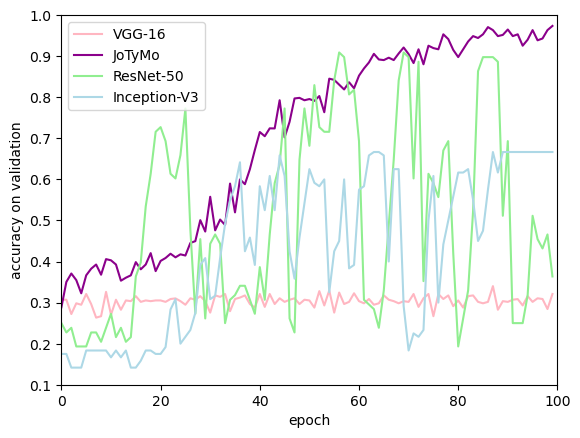

In [147]:
plt.plot(np.array(vgg.history['val_accuracy']) , label='VGG-16' , color = 'lightpink')
plt.plot(clasy.history['val_accuracy'] , label = 'JoTyMo' , color = 'darkmagenta')
plt.plot(np.array(resnet.history['val_accuracy']) , label = 'ResNet-50' , color = 'lightgreen')
plt.plot(np.array(inception.history['val_accuracy']), label = 'Inception-V3' , color = 'lightblue')
plt.xlabel("epoch")
plt.ylim([0.1 , 1])
plt.xlim([0 , 100])
plt.savefig("accuracy-classification.png" , dpi = 2500)
plt.ylabel("accuracy on validation")
plt.legend()

In [21]:
pred = model.predict([x_1_test , x_2_test])

pred_label = []
test_label = []
for i in pred:
    pred_label.append(np.argmax(i))
for i in y_test:
    test_label.append(np.argmax(i))
print(classification_report(test_label , pred_label))

2023-08-19 10:31:24.673460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 370ms/step
              precision    recall  f1-score   support

           0       0.06      0.05      0.05        20
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        19
           3       0.13      0.42      0.20        19

    accuracy                           0.11        80
   macro avg       0.05      0.12      0.06        80
weighted avg       0.04      0.11      0.06        80



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Mobile Net V2

In [13]:
from keras.applications import MobileNetV2


Inception_layer = MobileNetV2(weights = None , input_shape=(96 , 96 , 6) , classes=4)

input_shape = (96, 96, 3)
input_1 = Input(shape=input_shape, name='input_1')
input_2 = Input(shape=input_shape, name='input_2')
x = Concatenate()([input_1, input_2])
output = Inception_layer(x)
model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(optimizer=keras.optimizers.legacy.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary
model.summary()

/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/applications/mobilenet_v2.py:299: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 6 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 96, 96, 6)            0         ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 mobilenetv2_1.00_96 (Funct  (None, 4)                    2263972   ['concatenate[0][0]']     

In [14]:
h = model.fit(
    [x_1_train , x_2_train], y_train, batch_size=32, steps_per_epoch=len(x_train)//32 ,
    validation_data=([x_1_test , x_2_test], y_test) , 
    epochs = 20 , verbose = 1 )

Epoch 1/20


2023-08-19 10:28:54.248032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 0.9265 - accuracy: 0.6037

2023-08-19 10:28:58.664084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 6s 101ms/step - loss: 0.9265 - accuracy: 0.6037 - val_loss: 1.3861 - val_accuracy: 0.2500
Epoch 2/20
22/22 [==============================] - 2s 60ms/step - loss: 0.4636 - accuracy: 0.8285 - val_loss: 1.3870 - val_accuracy: 0.2500
Epoch 3/20
22/22 [==============================] - 1s 59ms/step - loss: 0.3559 - accuracy: 0.8808 - val_loss: 1.3889 - val_accuracy: 0.2375
Epoch 4/20
22/22 [==============================] - 1s 60ms/step - loss: 0.1479 - accuracy: 0.9593 - val_loss: 1.3924 - val_accuracy: 0.2375
Epoch 5/20
22/22 [==============================] - 1s 60ms/step - loss: 0.0483 - accuracy: 0.9811 - val_loss: 1.3966 - val_accuracy: 0.2375
Epoch 6/20
22/22 [==============================] - 1s 61ms/step - loss: 0.1350 - accuracy: 0.9709 - val_loss: 1.4012 - val_accuracy: 0.2375
Epoch 7/20
22/22 [==============================] - 1s 63ms/step - loss: 0.1662 - accuracy: 0.9608 - val_loss: 1.4100 - val_accuracy: 0.2375
Epoch 8/20
22/22 [=====

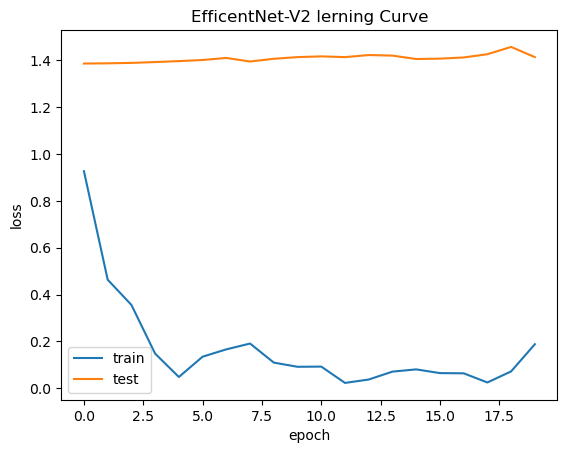

In [16]:
plt.plot(h.history['loss'] , label = 'train')
plt.plot(h.history['val_loss'] , label = 'test')
plt.title("EfficentNet-V2 lerning Curve")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import classification_report

pred = model.predict([x_1_test , x_2_test])

pred_label = []
test_label = []
for i in pred:
    pred_label.append(np.argmax(i))
for i in y_test:
    test_label.append(np.argmax(i))
print(classification_report(test_label , pred_label))

2023-08-19 10:29:56.067813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 132ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.28      1.00      0.43        22
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        19

    accuracy                           0.28        80
   macro avg       0.07      0.25      0.11        80
weighted avg       0.08      0.28      0.12        80



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
